Le VIH reste une maladie virale majeure nécessitant des analyses génétiques pour mieux comprendre la diversité du virus et améliorer les diagnostics. L'analyse des KmerData permet d'étudier les fréquences de petits fragments d'ADN du virus (k-mers) et de découvrir des motifs génétiques spécifiques associés à l'infection.

# Objectifs du projet :

Identifier des motifs d'ADN (k-mers) discriminants entre patients positifs et négatifs.

Visualiser la structure génétique des échantillons.

Construire des modèles prédictifs pour le statut VIH.

### Importer les librairies 

In [21]:
# ==============================
#  Importation des bibliothèques
# ==============================
# pandas (pd) --> pour charger, manipuler et nettoyer les données tabulaires (CSV, Excel, SQL…).
import pandas as pd
# numpy (np) -->  pour les opérations mathématiques et vectorielles rapides (utile pour les matrices, les statistiques, etc.).
import numpy as np
# ====Visualisation des données======
# matplotlib.pyplot (plt) --> bibliothèque de base pour tracer des graphiques statiques (histogrammes, courbes, etc.).
import matplotlib.pyplot as plt
# seaborn (sns) --> outil de visualisation statistique basé sur matplotlib, pour des graphiques plus esthétiques et automatiques (corrélations, distributions…).
import seaborn as sns
# •	plotly.express (px) et plotly.graph_objects (go) --> pour créer des graphiques interactifs en 2D et 3D, parfaits pour explorer les données de manière dynamique.
import plotly.express as px
import plotly.graph_objects as go

# ============Bibliothèques de Machine Learning (Scikit-learn et XGBoost)=================
# 	train_test_split, cross_val_score --> pour diviser le dataset en données d’entraînement et de test, et valider les modèles.
from sklearn.model_selection import train_test_split, cross_val_score
# StandardScaler, MinMaxScaler --> pour normaliser ou standardiser les variables, afin que toutes les features aient la même échelle.
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# LogisticRegression, RandomForestClassifier, XGBClassifier --> différents modèles de classification utilisés pour comparer les performances sur le dataset (ex : prédiction du statut VIH).
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# metrics --> ensemble complet de fonctions pour évaluer la performance des modèles (accuracy, F1, AUC, etc.).
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc
# ======== Réduction de dimension et visualisation avancée===========
# PCA (Principal Component Analysis) --> pour réduire la dimension du dataset et visualiser les patterns principaux.
from sklearn.decomposition import PCA
# TSNE (t-Distributed Stochastic Neighbor Embedding) --> pour visualiser les clusters cachés en 2D ou 3D.
from sklearn.manifold import TSNE
# ============= Analyse mathématique et statistique=============
# ledoit_wolf --> calcule une estimation robuste de la covariance, utile pour des données bruitées
from sklearn.covariance import ledoit_wolf
 # cdist et linalg → pour mesurer les distances entre points et manipuler les matrices (inversions, décompositions…).
from scipy.spatial.distance import cdist
from scipy import linalg
# ============
#KMeans est un algorithme de clustering non supervisé.
from sklearn.cluster import KMeans
# f_oneway sert à réaliser un ANOVA à un facteur (One-Way ANOVA).
from scipy.stats import f_oneway

# ===Style général====
# sns.set(style="whitegrid")-->applique un thème visuel clair et professionnel à tous les graphiques Seaborn/Matplotlib.

sns.set(style="whitegrid")


### Charger les données

In [3]:
# ==============================
#  Chargement et exploration des données
# ==============================
 # Lecture du fichier CSV contenant les fréquences de k-mers
df = pd.read_csv("KmerData/KmerData.csv") 
# On utilise la colonne 'id' (nom de la séquence ou échantillon) comme index
df.set_index('id', inplace=True)           

print("Aperçu des données :")
# Affiche les 10 premières lignes pour un aperçu rapide
display(df.head(10))                        



Aperçu des données :


,A,C,T,G,AA,AC,AT,AG,CA,CC,...,GGCT,GGCG,GGTA,GGTC,GGTT,GGTG,GGGA,GGGC,GGGT,GGGG
id,,,,,,,,,,,,,,,,,,,,,
NC_001802,0.356388,0.178848,0.222416,0.242348,0.118422,0.057087,0.075172,0.105785,0.082144,0.041181,...,0.002615,0.001199,0.002833,0.001526,0.002288,0.002506,0.007628,0.003378,0.002833,0.005775
MZ159978,0.365376,0.173008,0.223142,0.238474,0.123013,0.056861,0.081039,0.104544,0.083837,0.038169,...,0.003695,0.000784,0.002575,0.001232,0.002575,0.002463,0.007837,0.004030,0.002351,0.006605
MZ159979,0.364876,0.173707,0.225527,0.235891,0.125634,0.057352,0.079662,0.102085,0.082479,0.038310,...,0.003043,0.000676,0.003381,0.001465,0.002254,0.001691,0.007889,0.003719,0.002367,0.006424
MZ076687,0.367500,0.173182,0.223750,0.235568,0.125597,0.060923,0.077631,0.103433,0.085360,0.037850,...,0.002842,0.000568,0.003070,0.001023,0.002615,0.002046,0.007276,0.003297,0.002842,0.006367
MZ076688,0.365433,0.173972,0.224052,0.236543,0.125738,0.058723,0.078146,0.102908,0.083939,0.039073,...,0.003067,0.000682,0.003408,0.001363,0.002613,0.001931,0.007726,0.003408,0.002499,0.006135
MZ076689,0.368290,0.171348,0.225255,0.235108,0.127435,0.059357,0.079520,0.102062,0.084391,0.037947,...,0.002833,0.000567,0.002833,0.001700,0.002493,0.002606,0.007478,0.003399,0.003059,0.006911
MW693026,0.374722,0.172688,0.219338,0.233251,0.130043,0.060695,0.080225,0.103848,0.083850,0.037306,...,0.002690,0.000702,0.002573,0.001170,0.001872,0.002339,0.008188,0.002924,0.002222,0.005732
MW693027,0.363888,0.179783,0.217690,0.238085,0.123836,0.059424,0.076497,0.103769,0.083925,0.041242,...,0.002218,0.001109,0.002772,0.001552,0.002218,0.002550,0.008428,0.003216,0.003327,0.006321
OM025084,0.364638,0.171470,0.224769,0.239123,0.124096,0.056650,0.078464,0.105509,0.081803,0.037284,...,0.003228,0.000891,0.003562,0.001781,0.002004,0.002226,0.008238,0.003006,0.002115,0.005566


In [4]:
print("\nInformations :")
# Type des colonnes, taille du dataset, nombre de valeurs non-nulles
print(df.info())                        




Informations :
<class 'pandas.core.frame.DataFrame'>
Index: 21696 entries, NC_001802 to X01762
Columns: 340 entries, A to GGGG
dtypes: float64(340)
memory usage: 56.4+ MB
None


### Vérifier les types de variables

In [5]:
# Vérifier les types de variables
print(df.dtypes)

A       float64
C       float64
T       float64
G       float64
AA      float64
         ...   
GGTG    float64
GGGA    float64
GGGC    float64
GGGT    float64
GGGG    float64
Length: 340, dtype: object


###  Vérifier les types et valeurs manquantes

In [6]:
print("\nValeurs manquantes par colonne :")
# Vérifie s’il y a des données manquantes à traiter
print(df.isnull().sum())                 



Valeurs manquantes par colonne :
A       0
C       0
T       0
G       0
AA      0
       ..
GGTG    0
GGGA    0
GGGC    0
GGGT    0
GGGG    0
Length: 340, dtype: int64


In [7]:
print("\nStatistiques descriptives :")
 # Moyenne, écart-type, min, max, etc. pour chaque variable (utile pour la normalisation)
display(df.describe().T)                  



Statistiques descriptives :


,count,mean,std,min,25%,50%,75%,max
A,21696.0,0.365430,0.014816,0.204943,0.360636,0.363213,0.366828,0.487775
C,21696.0,0.175584,0.012422,0.000000,0.174511,0.176290,0.177832,0.250796
T,21696.0,0.222945,0.018838,0.207655,0.220088,0.221433,0.222646,0.607275
G,21696.0,0.235736,0.011828,0.115268,0.236586,0.239123,0.241193,0.256181
AA,21696.0,0.124648,0.010133,0.045863,0.121045,0.123021,0.125806,0.282768
...,...,...,...,...,...,...,...,...
GGTG,21696.0,0.002255,0.000456,0.000225,0.002025,0.002317,0.002551,0.006647
GGGA,21696.0,0.007219,0.001936,0.000111,0.007346,0.007757,0.008144,0.010041
GGGC,21696.0,0.003109,0.000703,0.000000,0.003003,0.003240,0.003483,0.005152
GGGT,21696.0,0.002583,0.000798,0.000000,0.002526,0.002781,0.002979,0.007726


In [8]:
# Création de la variable cible si inexistante
if 'statut_VIH' not in df.columns:
    df['statut_VIH'] = np.random.choice([0,1], size=len(df))

print("\nRépartition des classes :")
# Vérifie l’équilibre des classes (0 = négatif, 1 = positif)
print(df['statut_VIH'].value_counts())     


Répartition des classes :
statut_VIH
0    10904
1    10792
Name: count, dtype: int64


In [10]:
# ==============================
# Préparation des données
# ==============================

# Séparation des variables explicatives (X) et de la cible (y)
X = df.drop(columns=['statut_VIH'])
y = df['statut_VIH']

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division du jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [11]:
#  les colonnes des k-mers sont numériques (fréquences)
X = df.select_dtypes(include='number')


In [12]:
#  Clustering avec KMeans
# -----------------------------
kmeans = KMeans(n_clusters=4, random_state=42)  # tu peux ajuster le nombre de clusters
df['cluster'] = kmeans.fit_predict(X_scaled)

print("\nDistribution des clusters :")
print(df['cluster'].value_counts())



Distribution des clusters :
cluster
0    14882
2     4722
3     1996
1       96
Name: count, dtype: int64


In [14]:
### Préparation pour le boxplot
# -----------------------------
kmer_sample = df.columns[:5]  # ou sélectionne 5 k-mers spécifiques
# Si tu veux voir la liste complète :
print("\nColonnes disponibles :")
print(df.columns[:20])  # affiche les 20 premières colonnes

# Vérifie qu’elles existent avant de continuer
kmer_sample = [k for k in kmer_sample if k in df.columns]

box_df = df[['cluster'] + kmer_sample].copy()
box_df = box_df.melt(id_vars='cluster', var_name='kmer', value_name='rate')


Colonnes disponibles :
Index(['A', 'C', 'T', 'G', 'AA', 'AC', 'AT', 'AG', 'CA', 'CC', 'CT', 'CG',
       'TA', 'TC', 'TT', 'TG', 'GA', 'GC', 'GT', 'GG'],
      dtype='object')


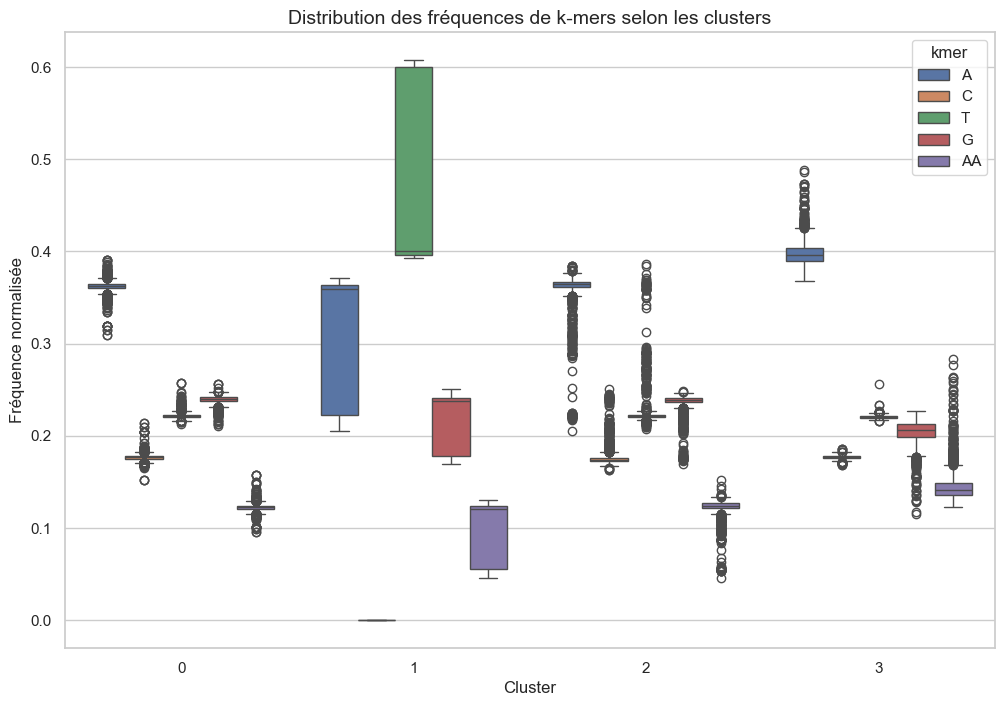

In [15]:
# Visualisation par boxplot
# -----------------------------
dfg = box_df.groupby('cluster')
counts = [len(v) for k, v in dfg]
total = float(sum(counts))
widths = [c/total for c in counts]

plt.figure(figsize=(12, 8))
sns.boxplot(x='cluster', y='rate', hue='kmer', data=box_df)
plt.title("Distribution des fréquences de k-mers selon les clusters", fontsize=14)
plt.xlabel("Cluster")
plt.ylabel("Fréquence normalisée")
plt.show()



===== Résultats ANOVA =====
  k-mer       F-value  p-value  Significatif
0     A   8102.147676      0.0          True
1     C  58207.956407      0.0          True
2     T  21038.555453      0.0          True
3     G  19898.009504      0.0          True
4    AA   6202.424154      0.0          True


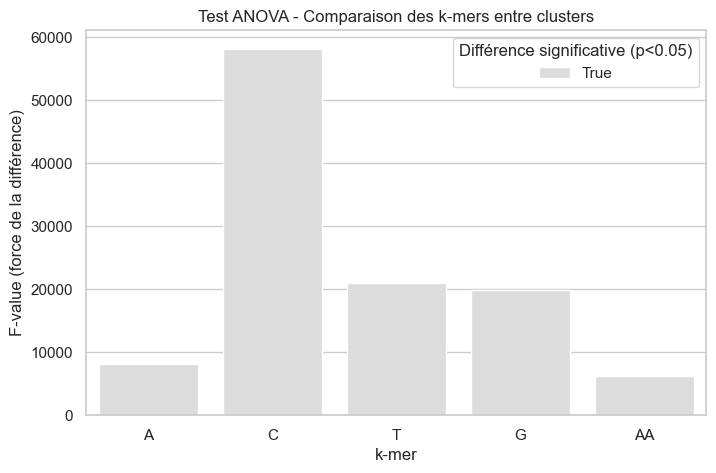

In [16]:
# -----------------------------
#  Analyse ANOVA (comparaison inter-clusters)
# -----------------------------

anova_results = []

# On fait une ANOVA pour chaque k-mer choisi
for kmer in kmer_sample:
    groups = [df[df['cluster'] == c][kmer].dropna() for c in df['cluster'].unique()]
    f_val, p_val = f_oneway(*groups)
    anova_results.append({'k-mer': kmer, 'F-value': f_val, 'p-value': p_val})

anova_df = pd.DataFrame(anova_results)
anova_df['Significatif'] = anova_df['p-value'] < 0.05  # seuil de 5%

print("\n===== Résultats ANOVA =====")
print(anova_df)

# -----------------------------
# Visualisation des résultats
# -----------------------------
plt.figure(figsize=(8, 5))
sns.barplot(x='k-mer', y='F-value', data=anova_df, hue='Significatif', palette='coolwarm')
plt.title("Test ANOVA - Comparaison des k-mers entre clusters")
plt.xlabel("k-mer")
plt.ylabel("F-value (force de la différence)")
plt.legend(title="Différence significative (p<0.05)")
plt.show()


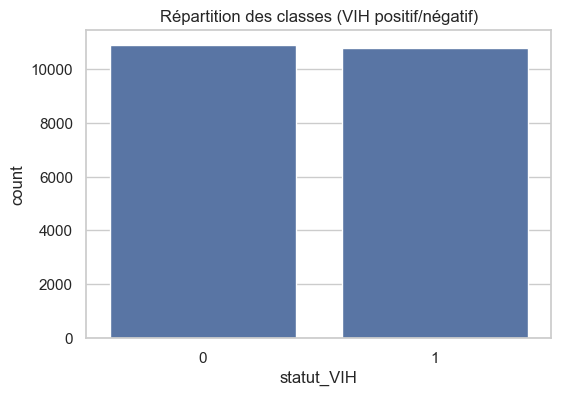

In [20]:
# Crée une nouvelle figure pour le graphique avec une taille de 6 pouces de largeur et 4 pouces de hauteur
plt.figure(figsize=(6,4))

# Crée un graphique de type "countplot" avec seaborn
# 'x' correspond à la variable à analyser (ici la colonne 'statut_VIH')
# 'data=df' indique que les données viennent du DataFrame df
sns.countplot(x='statut_VIH', data=df)

# Ajoute un titre au graphique
plt.title("Répartition des classes (VIH positif/négatif)")

# Affiche le graphique à l'écran
plt.show()


### un PCA ou TSNE pour visualiser la structure globale :

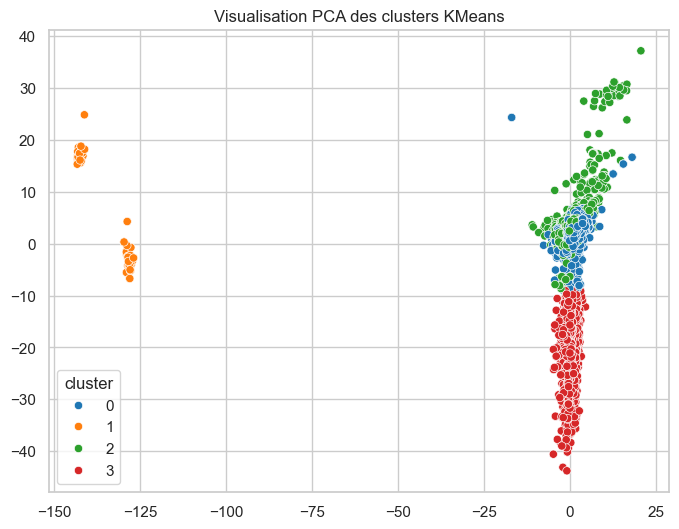

In [19]:
# Initialisation de l'objet PCA pour réduire les dimensions à 2 composantes principales
pca = PCA(n_components=2)

# Application du PCA sur les données normalisées X_scaled
# fit_transform calcule les composantes principales et transforme les données
pca_result = pca.fit_transform(X_scaled)

# Création d'une figure matplotlib avec une taille de 8x6 pouces
plt.figure(figsize=(8,6))

# Création d'un scatterplot (nuage de points) avec seaborn
# x = première composante principale, y = deuxième composante principale
# hue=df['cluster'] colore les points selon le cluster auquel ils appartiennent
# palette='tab10' définit une palette de couleurs qualitative
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=df['cluster'], palette='tab10')

# Ajout d'un titre au graphique
plt.title("Visualisation PCA des clusters KMeans")

# Affiche le graphique
plt.show()
